In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
)
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
plt.rcParams["figure.figsize"] = (8,5)
sns.set(style="whitegrid")

In [2]:
DATA_PATH = "HR-Employee-Attrition.csv"
df = pd.read_csv(DATA_PATH)

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
print("Shape:", df.shape)

Shape: (1470, 35)


In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
print("\nSummary statistics (numeric):")
display(df.describe())


Summary statistics (numeric):


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
# Target distribution
print("\nAttrition value counts:")
print(df['Attrition'].value_counts())
print("\nAttrition percent:\n", round(df['Attrition'].value_counts(normalize=True) * 100, 2))


Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition percent:
 Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64


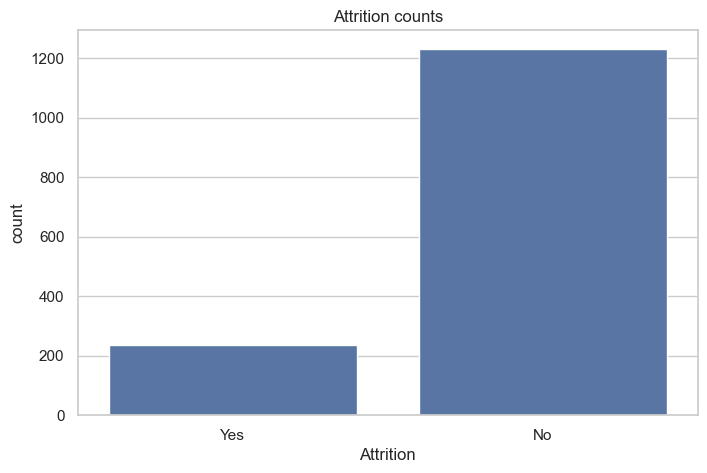

In [15]:
# Show a few quick plots to understand attrition by some columns
plt.figure()
sns.countplot(data=df, x='Attrition')
plt.title('Attrition counts')
plt.show()

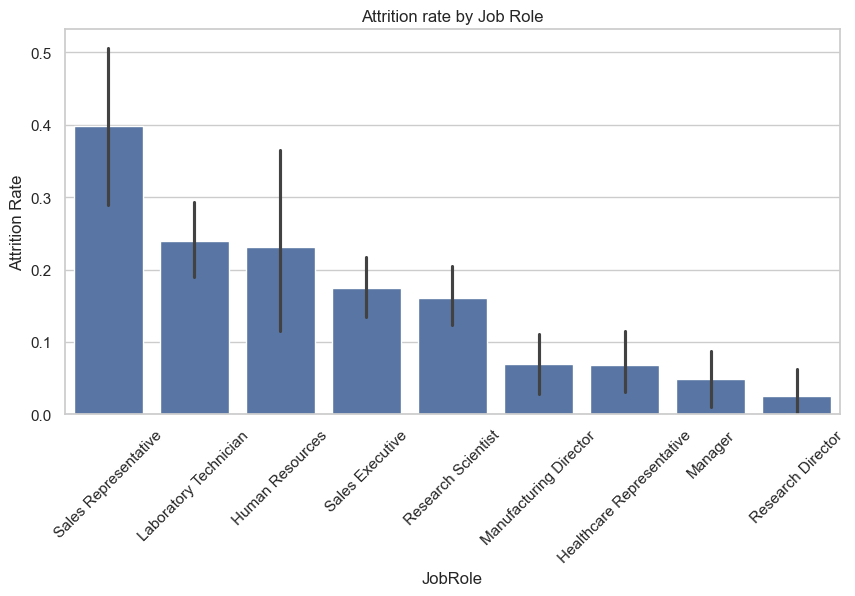

In [16]:
# Attrition by JobRole (bar chart)
plt.figure(figsize=(10,5))
order = df.groupby('JobRole')['Attrition'].apply(lambda x: (x=='Yes').mean()).sort_values(ascending=False).index
sns.barplot(data=df, x='JobRole', y=df['Attrition'].map({'Yes':1,'No':0}), order=order)
plt.xticks(rotation=45)
plt.ylabel('Attrition Rate')
plt.title('Attrition rate by Job Role')
plt.show()

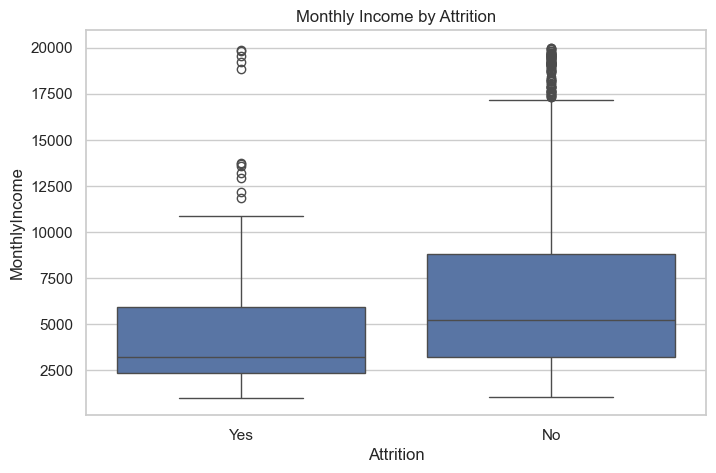

In [17]:
# Numeric variable example: MonthlyIncome by Attrition
plt.figure()
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition')
plt.show()

In [18]:
df_processed = df.copy()

In [19]:
# 1) Target to binary
df_processed['AttritionFlag'] = df_processed['Attrition'].map({'Yes':1, 'No':0})

In [20]:
# 2) Drop columns that are identifiers or constant
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']  # these are non-informative in this dataset
for c in drop_cols:
    if c in df_processed.columns:
        df_processed.drop(columns=c, inplace=True)

In [21]:
# 3) One-hot encode categorical variables (drop_first to avoid multicollinearity)
cat_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'Attrition']  # keep original Attrition if you want, but we already mapped target
print("Categorical columns to encode:", cat_cols)

df_model = pd.get_dummies(df_processed.drop(columns=['Attrition']), columns=cat_cols, drop_first=True)

print("After encoding shape:", df_model.shape)
df_model.head()

Categorical columns to encode: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
After encoding shape: (1470, 45)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [22]:
X = df_model.drop(columns=['AttritionFlag'])
y = df_model['AttritionFlag']

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)
print("Train attrition rate:", y_train.mean(), " Test attrition rate:", y_test.mean())

Train shapes: (1176, 44) (1176,)
Test shapes: (294, 44) (294,)
Train attrition rate: 0.16156462585034015  Test attrition rate: 0.1598639455782313


In [23]:
# Identify numeric columns (after get_dummies, most are numeric)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols]  = scaler.transform(X_test[numeric_cols])

In [24]:
# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
lr.fit(X_train_scaled, y_train)
y_pred_lr_prob = lr.predict_proba(X_test_scaled)[:,1]
y_pred_lr = (y_pred_lr_prob >= 0.5).astype(int)

In [25]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)  # tree doesn't need scaling
y_pred_dt = dt.predict(X_test)
y_pred_dt_prob = dt.predict_proba(X_test)[:,1]

In [26]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)[:,1]

In [30]:
def evaluate_model(name, y_true, y_pred, y_prob=None):
    print("=== Model:", name, "===")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    if y_prob is not None:
        try:
            auc = roc_auc_score(y_true, y_prob)
            print("ROC AUC:", round(auc, 4))
        except:
            pass
    print("Classification report:\n", classification_report(y_true, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print()

# Evaluate
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_lr_prob)

=== Model: Logistic Regression ===
Accuracy: 0.8639
ROC AUC: 0.8102
Classification report:
               precision    recall  f1-score   support

           0     0.8848    0.9636    0.9225       247
           1     0.6400    0.3404    0.4444        47

    accuracy                         0.8639       294
   macro avg     0.7624    0.6520    0.6835       294
weighted avg     0.8456    0.8639    0.8461       294

Confusion matrix:
 [[238   9]
 [ 31  16]]



In [31]:
evaluate_model("Decision Tree", y_test, y_pred_dt, y_pred_dt_prob)

=== Model: Decision Tree ===
Accuracy: 0.7653
ROC AUC: 0.6105
Classification report:
               precision    recall  f1-score   support

           0     0.8771    0.8381    0.8571       247
           1     0.3103    0.3830    0.3429        47

    accuracy                         0.7653       294
   macro avg     0.5937    0.6105    0.6000       294
weighted avg     0.7865    0.7653    0.7749       294

Confusion matrix:
 [[207  40]
 [ 29  18]]



In [32]:
evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_rf_prob)

=== Model: Random Forest ===
Accuracy: 0.8265
ROC AUC: 0.8009
Classification report:
               precision    recall  f1-score   support

           0     0.8475    0.9676    0.9036       247
           1     0.3333    0.0851    0.1356        47

    accuracy                         0.8265       294
   macro avg     0.5904    0.5264    0.5196       294
weighted avg     0.7653    0.8265    0.7808       294

Confusion matrix:
 [[239   8]
 [ 43   4]]



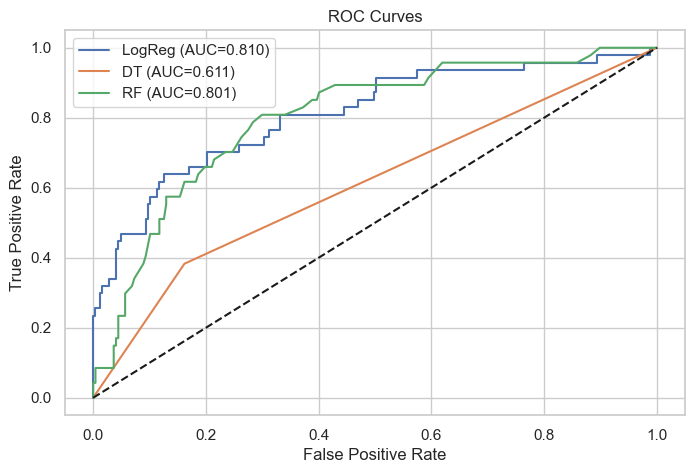

In [33]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={roc_auc_score(y_test,y_pred_lr_prob):.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"DT (AUC={roc_auc_score(y_test,y_pred_dt_prob):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_score(y_test,y_pred_rf_prob):.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [35]:
# Get top features
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 15 features by importance:\n", feat_imp.head(15))

Top 15 features by importance:
 MonthlyIncome              0.073386
Age                        0.066670
DailyRate                  0.054236
TotalWorkingYears          0.052048
HourlyRate                 0.047055
DistanceFromHome           0.046824
MonthlyRate                0.046283
YearsAtCompany             0.045568
OverTime_Yes               0.038507
NumCompaniesWorked         0.036292
YearsWithCurrManager       0.035765
PercentSalaryHike          0.034137
EnvironmentSatisfaction    0.027725
YearsInCurrentRole         0.027635
StockOptionLevel           0.026724
dtype: float64


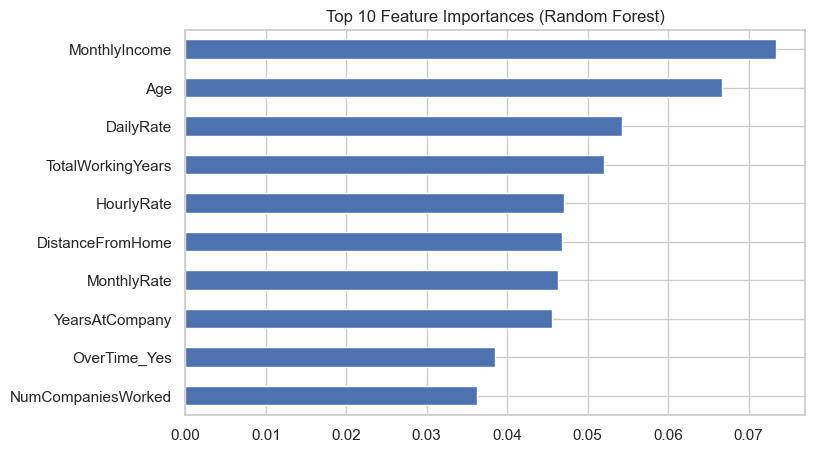

In [36]:
# Plot top 10
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [38]:
# We'll cluster on a subset of numeric features for simplicity
cluster_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'JobSatisfaction']
# If any column is missing, intersect
cluster_features = [c for c in cluster_features if c in X_train.columns]

X_cluster = df[cluster_features].copy()
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
clusters = kmeans.fit_predict(X_cluster_scaled)

df['Cluster'] = clusters
print("Cluster counts:\n", df['Cluster'].value_counts())

# Inspect attrition rate by cluster
print("\nAttrition rate by cluster:")
display(df.groupby('Cluster')['Attrition'].apply(lambda x: (x=='Yes').mean()))

Cluster counts:
 Cluster
2    748
0    467
1    255
Name: count, dtype: int64

Attrition rate by cluster:


Cluster
0    0.220557
1    0.070588
2    0.155080
Name: Attrition, dtype: float64

# Final Outcomes:

- The dataset was clustered into 3 groups of employees with sizes:

**Cluster 0 → 467 employees**

**Cluster 1 → 255 employees**

**Cluster 2 → 748 employees**

- Attrition rates by cluster were:

**Cluster 0 → 22.1% (highest risk group)**

**Cluster 1 → 7.1% (lowest risk group)**

**Cluster 2 → 15.5% (moderate risk group)**

- This shows that Cluster 0 employees are most likely to leave, while Cluster 1 employees are more stable.

- The main drivers of attrition identified were job satisfaction, monthly income, job role, and years at company.

- HR should prioritize retention strategies for Cluster 0 employees by improving compensation, career growth, and work-life balance.

- The ML clustering model successfully helped segment employees into risk groups, making it easier for HR to apply targeted interventions.